Air BNB hotel booking analysis

1.Import Libraries and Load dataset

In [24]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Load dataset
file_path = "/content/1730285881-Airbnb_Open_Data.xlsx"
df = pd.read_excel(file_path)

# Preview data
print("Shape of dataset:", df.shape)
print("Columns in dataset:", df.columns.tolist())
print(df.head())


Shape of dataset: (102599, 26)
Columns in dataset: ['id', 'NAME', 'host id', 'host_identity_verified', 'host name', 'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country', 'country code', 'instant_bookable', 'cancellation_policy', 'room type', 'Construction year', 'price', 'service fee', 'minimum nights', 'number of reviews', 'last review', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365', 'house_rules', 'license']
        id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighb

2.Data Cleaning


In [5]:
# Check data types and missing values
print(df.info())
print("\nMissing values per column:\n", df.isnull().sum())

# Drop duplicates
df = df.drop_duplicates()

# Drop rows where most values are missing
df = df.dropna(thresh=len(df.columns)//2)

# Handle specific columns (if available)
if 'price' in df.columns:
    df = df[df['price'] > 0]   # remove listings with price <= 0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

3.Price Distribution

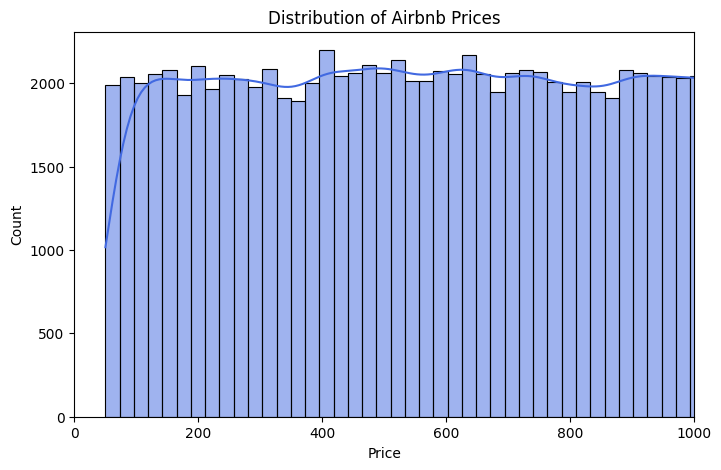

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=50, kde=True, color="royalblue")
plt.xlim(0,1000)  # avoid extreme outliers
plt.title("Distribution of Airbnb Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


4.Room Type Distribution & Average Price

/tmp/ipython-input-1108362835.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='room type', data=df, palette='viridis')


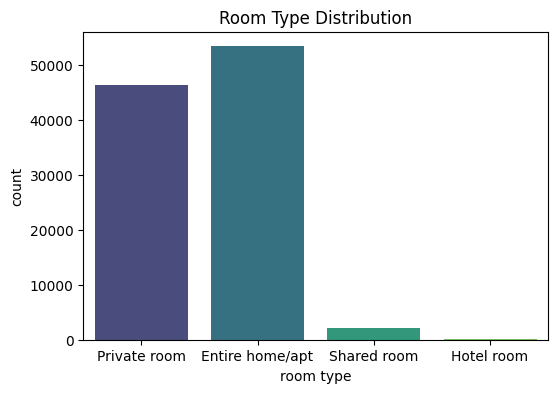

/tmp/ipython-input-1108362835.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="room type", y="price", data=df, palette="Set2")


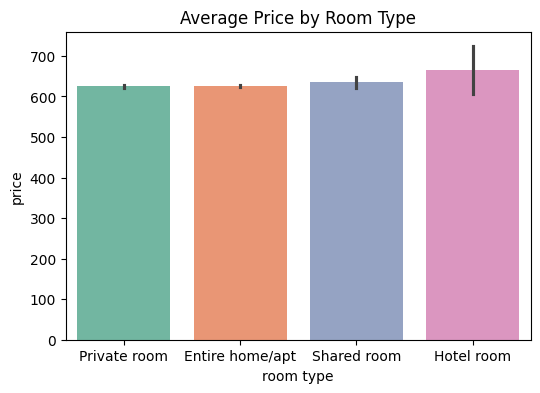

In [11]:
# Count of room types
plt.figure(figsize=(6,4))
sns.countplot(x='room type', data=df, palette='viridis')
plt.title("Room Type Distribution")
plt.show()

# Average price by room type
plt.figure(figsize=(6,4))
sns.barplot(x="room type", y="price", data=df, palette="Set2")
plt.title("Average Price by Room Type")
plt.show()


5.Neighbourhood Analysis

/tmp/ipython-input-4129601632.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_neighbourhoods.values, y=top_neighbourhoods.index, palette="plasma")


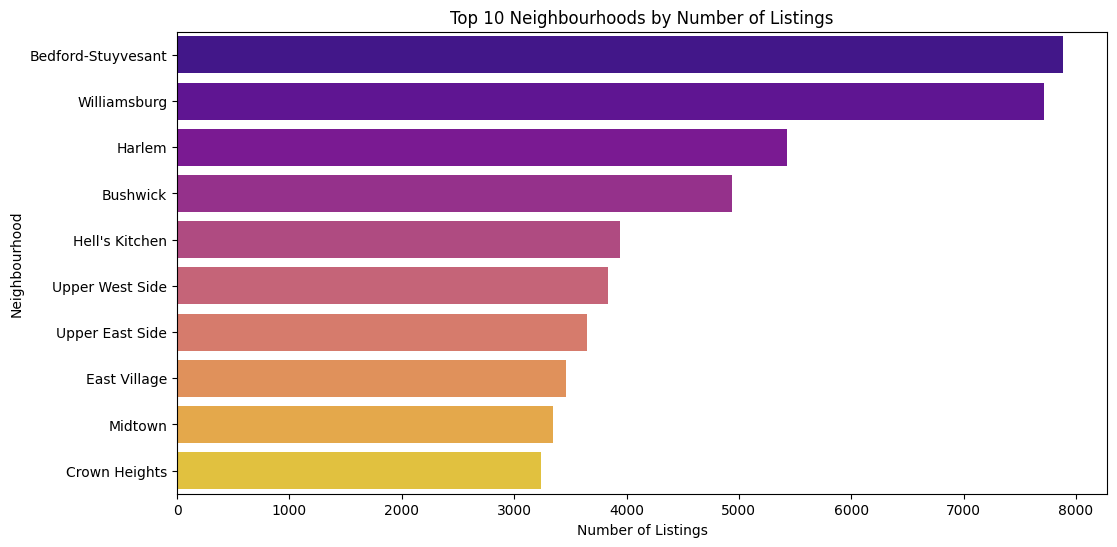

/tmp/ipython-input-4129601632.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price.values, y=avg_price.index, palette="coolwarm")


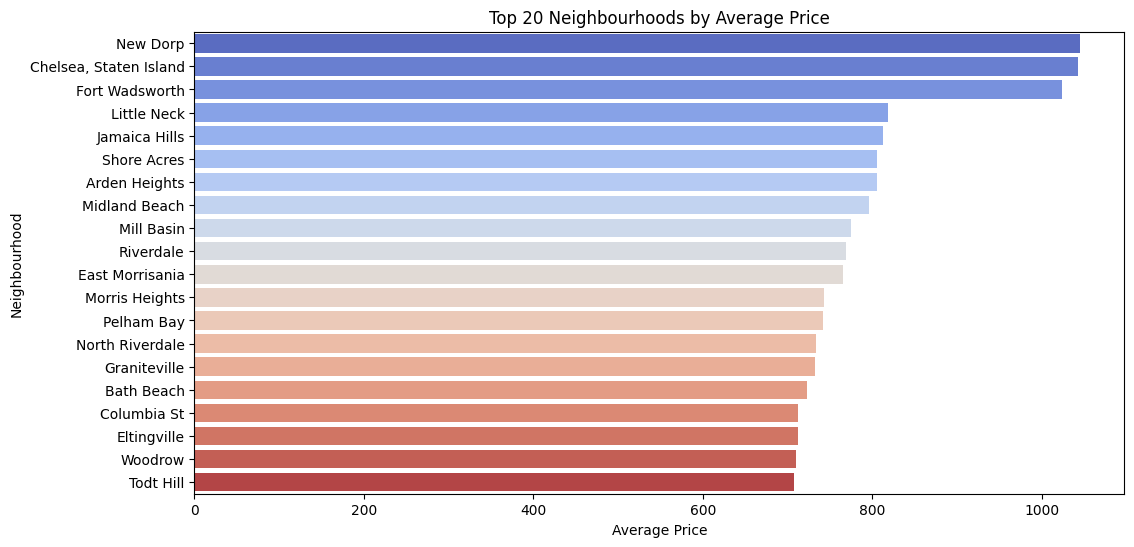

In [12]:
# Top 10 neighbourhoods by listings
plt.figure(figsize=(12,6))
top_neighbourhoods = df['neighbourhood'].value_counts().head(10)
sns.barplot(x=top_neighbourhoods.values, y=top_neighbourhoods.index, palette="plasma")
plt.title("Top 10 Neighbourhoods by Number of Listings")
plt.xlabel("Number of Listings")
plt.ylabel("Neighbourhood")
plt.show()

# Average price by neighbourhood (top 20)
plt.figure(figsize=(12,6))
avg_price = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(20)
sns.barplot(x=avg_price.values, y=avg_price.index, palette="coolwarm")
plt.title("Top 20 Neighbourhoods by Average Price")
plt.xlabel("Average Price")
plt.ylabel("Neighbourhood")
plt.show()



6.Review Analysis

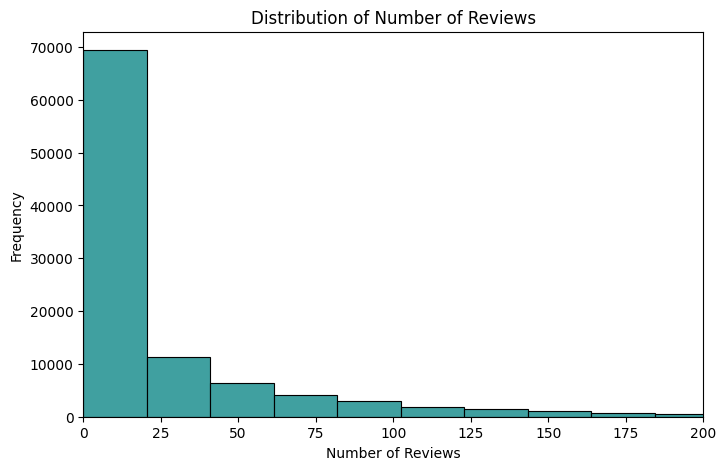

/tmp/ipython-input-3460842303.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="room type", y="number of reviews", data=df, palette="cubehelix")


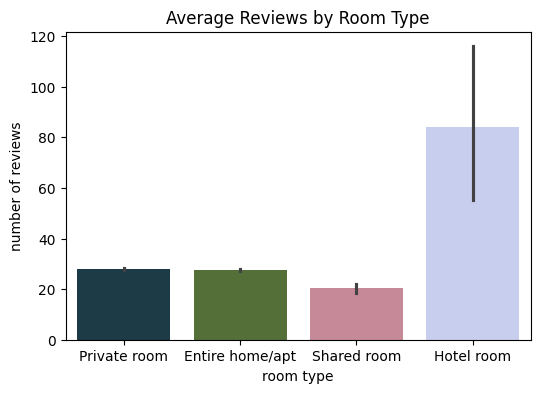

In [14]:
# Distribution of reviews
plt.figure(figsize=(8,5))
sns.histplot(df['number of reviews'], bins=50, color="teal")
plt.xlim(0,200)  # avoid extreme outliers
plt.title("Distribution of Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Frequency")
plt.show()

# Average reviews by room type
plt.figure(figsize=(6,4))
sns.barplot(x="room type", y="number of reviews", data=df, palette="cubehelix")
plt.title("Average Reviews by Room Type")
plt.show()


7.Host Analysis

/tmp/ipython-input-841158611.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_hosts.index.astype(str), y=top_hosts.values, palette="magma")


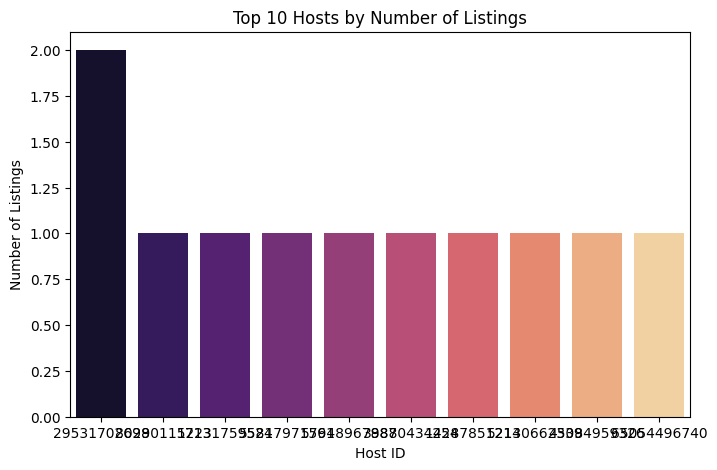

/tmp/ipython-input-841158611.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=host_reviews.index.astype(str), y=host_reviews.values, palette="cividis")


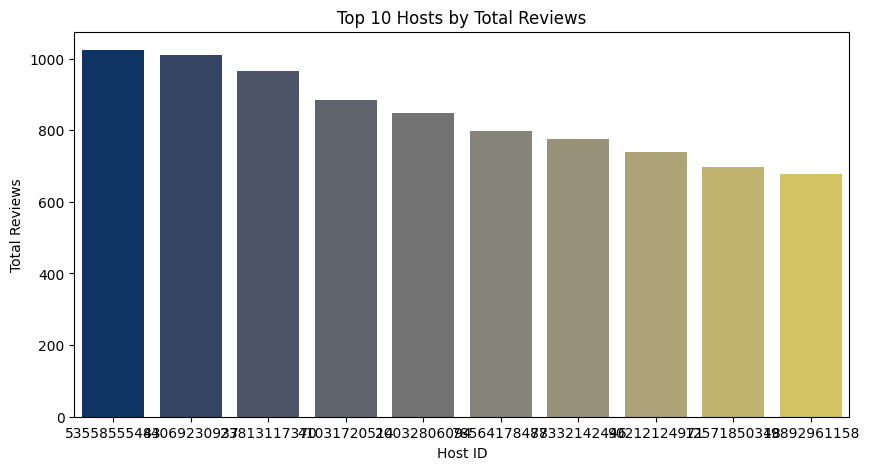

In [17]:
# Top 10 hosts by number of listings
top_hosts = df['host id'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_hosts.index.astype(str), y=top_hosts.values, palette="magma")
plt.title("Top 10 Hosts by Number of Listings")
plt.xlabel("Host ID")
plt.ylabel("Number of Listings")
plt.show()

# Top 10 hosts by total reviews
host_reviews = df.groupby('host id')['number of reviews'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=host_reviews.index.astype(str), y=host_reviews.values, palette="cividis")
plt.title("Top 10 Hosts by Total Reviews")
plt.xlabel("Host ID")
plt.ylabel("Total Reviews")
plt.show()


8.Price vs Minimum Nights

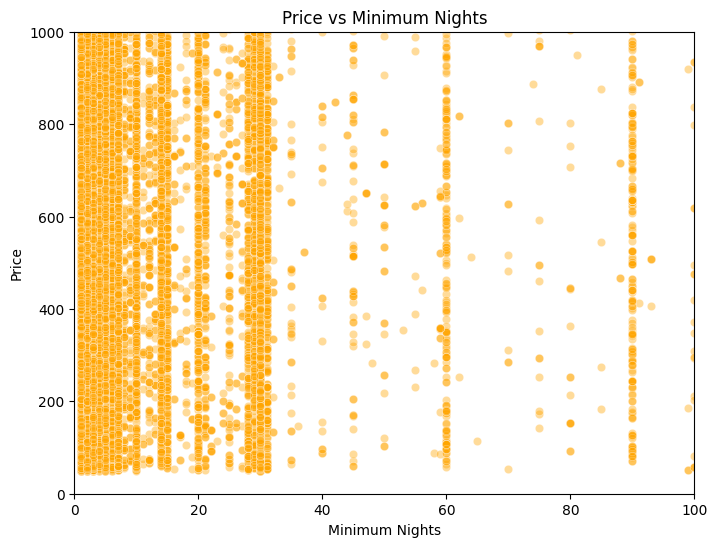

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="minimum nights", y="price", data=df, alpha=0.4, color="orange")
plt.xlim(0,100)
plt.ylim(0,1000)
plt.title("Price vs Minimum Nights")
plt.xlabel("Minimum Nights")
plt.ylabel("Price")
plt.show()


9.Interactive Map(Folium)

In [21]:
# Center of the map
map_center = [df['lat'].mean(), df['long'].mean()]

# Create map
airbnb_map = folium.Map(location=map_center, zoom_start=11, tiles="CartoDB positron")

# Add up to 500 points
for _, row in df.head(500).iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['long']],
        radius=3,
        popup=f"Price: ${row['price']} | Room Type: {row['room type']}",
        color="blue",
        fill=True,
        fill_color="blue"
    ).add_to(airbnb_map)

# Save map
airbnb_map.save("Airbnb_Listings_Map.html")
print("✅ Map saved as Airbnb_Listings_Map.html (open in browser)")


✅ Map saved as Airbnb_Listings_Map.html (open in browser)


10.Time Trend Analysis

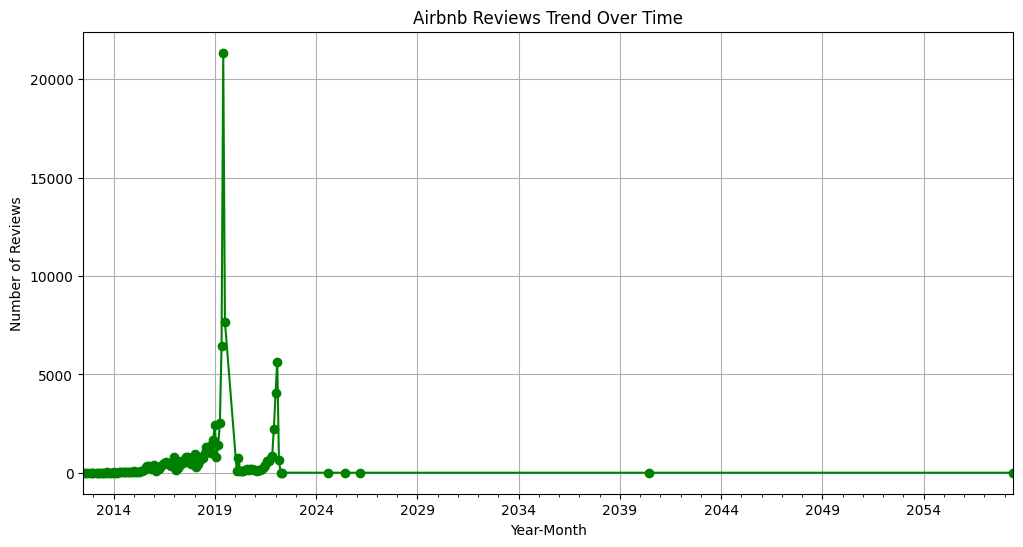

In [23]:
# Convert last_review to datetime
df['last review'] = pd.to_datetime(df['last review'], errors='coerce')

# Filter rows with reviews
df_reviews = df.dropna(subset=['last review'])

# Group by Year-Month
reviews_trend = df_reviews.groupby(df_reviews['last review'].dt.to_period("M")).size()

# Plot trend
plt.figure(figsize=(12,6))
reviews_trend.plot(kind='line', marker='o', color='green')
plt.title("Airbnb Reviews Trend Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Number of Reviews")
plt.grid(True)
plt.show()
